# **Cross-platform Analysis of Most Streamed Spotify Songs 2023**
This analysis looks at the most streamed spotify songs of 2023 and how they perform across different music streaming platforms. 

### 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/top-spotify-songs-2023/spotify-2023.csv


### 2. Load the dataset

In [2]:
df=pd.read_csv("/kaggle/input/top-spotify-songs-2023/spotify-2023.csv",encoding='latin-1')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [3]:
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset contains 953 rows and 24 columns.


In [4]:
# Print the DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

### 3. Data Cleaning

In [5]:
#check missing values
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

**Missing Values in coulmns:**
* in_shazam_charts = 50 
* key = 95

In [6]:
# Missing values in column 'key' will be replaced as 'missing_key' because the data must be an object
df['key'] = df['key'].fillna("missing_key")

# Missing values in column 'in shazam charts' will be replaced with 0 because the data must be an integer
df['in_shazam_charts'] = df['in_shazam_charts'].fillna(0)

df.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

Now we dont have missing values. 

**Remove duplicate songs**


In [7]:
df.duplicated(subset=['track_name','artist(s)_name']).sum()

df[df.duplicated(subset=['track_name', 'artist(s)_name'], keep=False)]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
178,SNAP,Rosa Linn,1,2022,3,19,3202,18,726307468,148,...,170,missing_key,Major,56,53,64,11,0,45,6
345,SPIT IN MY FACE!,ThxSoMch,1,2022,10,31,629,14,303216294,32,...,94,G#,Major,73,65,79,5,2,11,6
372,About Damn Time,Lizzo,1,2022,7,15,2332,2,723894473,0,...,109,A#,Minor,84,72,74,10,0,34,7
482,SPIT IN MY FACE!,ThxSoMch,1,2022,10,31,573,0,301869854,1,...,166,C#,Major,70,57,57,9,20,11,7
512,Take My Breath,The Weeknd,1,2021,8,6,2597,0,130655803,17,...,121,A#,Minor,70,35,77,1,0,26,4
616,Take My Breath,The Weeknd,1,2021,8,6,6392,0,432702334,174,...,121,G#,Major,75,53,74,2,0,11,5
764,About Damn Time,Lizzo,1,2022,4,14,9021,0,723894473,242,...,109,A#,Minor,84,72,74,10,0,34,7
873,SNAP,Rosa Linn,1,2022,3,19,1818,0,711366595,3,...,170,missing_key,Major,56,52,64,11,0,45,7


In [8]:
# Remove duplicates based on 'track_name' and 'artist(s)_name'
df_cleaned = df.drop_duplicates(subset=['track_name', 'artist(s)_name'], keep='first')

# Print the number of rows after removing duplicates
print(f"Number of rows after removing duplicates: {df_cleaned.shape[0]}")

Number of rows after removing duplicates: 949


**Data type conversion**

Converting specific columns to numeric data type (float64 or int64), coercing any errors encountered (such as non-numeric strings) to NaN (Not a Number).

In [9]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               952 non-null    float64
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   874 non-null    float64
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      946 non-null    float64
 14  bpm                   953 non-null    int64  
 15  key                   9

### 4. Exploratory Data Analysis (EDA)

**The graph shows a distribution of songs based on the number of artists involved in each song.**

The x-axis represents the number of artists contributing to a song (artist_count).
The y-axis shows the count of songs for each category of artist count.

The data indicates that single-artist songs dominate the dataset, with a significant drop in frequency as the number of artists per song increases beyond two.

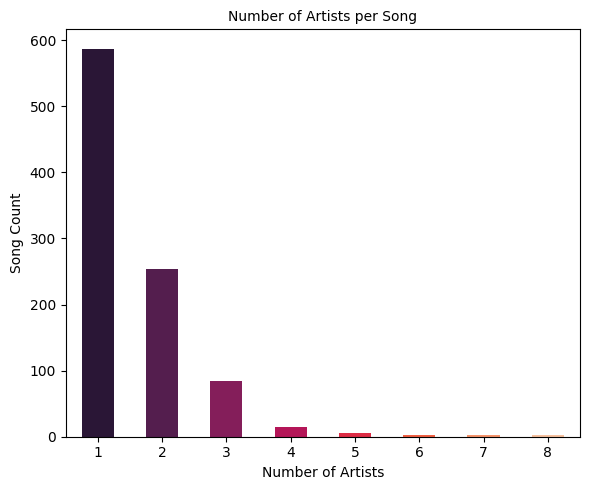

In [10]:
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='artist_count', palette="rocket", width=0.5, saturation=2)
plt.title('Number of Artists per Song', fontsize=10)
plt.xlabel('Number of Artists')
plt.ylabel('Song Count')
plt.tight_layout()
plt.show()

**The graph displays the total streams accumulated by the top 10 artists in our dataset.**

The y-axis lists the names of the artists, sorted by their total streams in descending order.

The x-axis represents the total streams in billions.

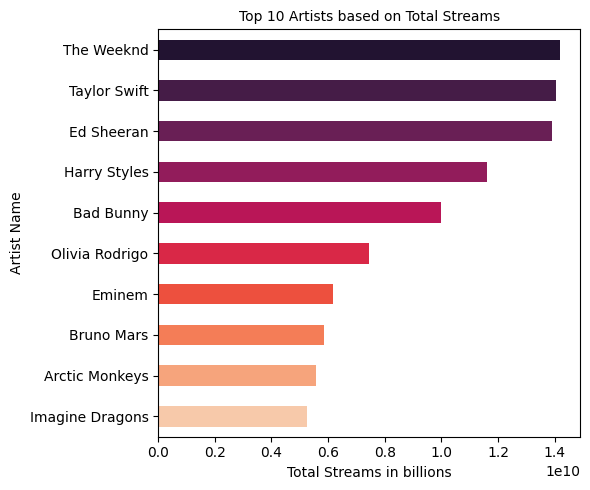

In [11]:
# Group by artist and sum up their streams
artist_streams = df.groupby('artist(s)_name')['streams'].sum().sort_values(ascending=False).head(10)

# Plot the artists with the most streams
plt.figure(figsize=(6, 5))
sns.barplot(x=artist_streams.values, y=artist_streams.index, palette="rocket" ,width=0.5, saturation = 2,orient='h')
plt.title('Top 10 Artists based on Total Streams', fontsize=10)
plt.xlabel('Total Streams in billions')
plt.ylabel('Artist Name')
plt.tight_layout()
plt.show()

 **Number of songs each artist has within the dataset.**

The y-axis lists the names of the artists, sorted by the number of songs they have in descending order.

The x-axis represents the count of songs.

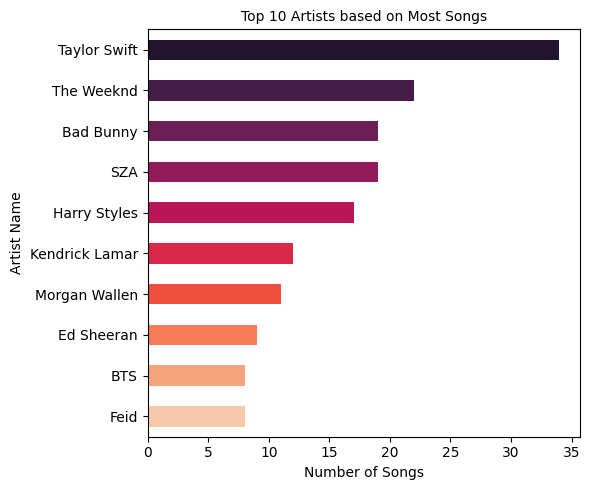

In [12]:
# Count every song by artist
top_artists = df['artist(s)_name'].value_counts().head(10)

# Plot the top 10 artists based on the number of songs
plt.figure(figsize=(6, 5))
sns.barplot(x=top_artists.values, y=top_artists.index, palette="rocket", width=0.5, saturation=2, orient='h')
plt.title('Top 10 Artists based on Most Songs', fontsize=10)
plt.xlabel('Number of Songs')
plt.ylabel('Artist Name')
plt.tight_layout()
plt.show()

**Correlation heatmap of chart appearances across Spotify, Apple Music, Deezer, and Shazam:**

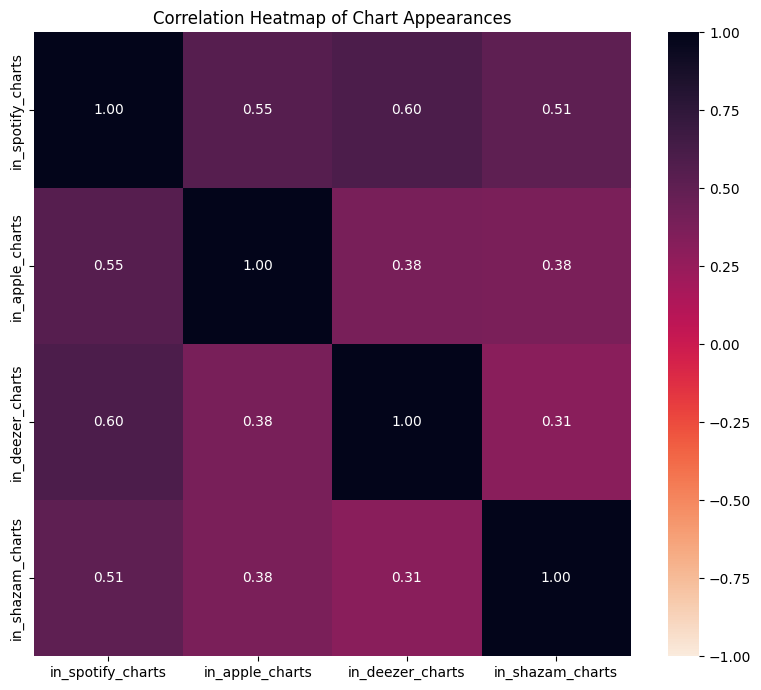

In [13]:
heatmap_data = df[['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts']]

#Correlation between the appearances of songs on different music charts (Spotify, Apple, Deezer, and Shazam)
plt.figure(figsize=(8, 7))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='rocket_r', fmt='.2f', vmin =-1, vmax = 1)
plt.title('Correlation Heatmap of Chart Appearances')
plt.tight_layout()
plt.show()

High correlation values suggest that the same songs are popular across multiple platforms, while low correlation values suggest platform-specific popularity.

The correlation coefficient measures the strength and direction of the linear relationship between two variables. It ranges from -1 to 1, where:

* 1 indicates a perfect positive correlation
* -1 indicates a perfect negative correlation
* 0 indicates no correlation

Strongest Correlation: 
* The highest correlation is between Spotify and Deezer charts (0.60), suggesting that songs popular on Spotify are likely to be popular on Deezer as well.

Moderate Correlation:
* Spotify and Apple have a moderate correlation (0.55), indicating that there is a significant overlap between songs popular on these two platforms.
* Spotify and Shazam also have a moderate correlation (0.51), implying that songs frequently appearing on Spotify charts are often recognized on Shazam.

Lower Correlation:
* Apple and Deezer have lower correlation (0.38) which is still positive but weaker compared to Spotify's correlations with other platforms.
* Apple and Shazam also has same correlation as Apple and Deezer (0.38).
* Deezer and Shazam have the lowest correlation (0.31), indicating less overlap between these platforms.

There is a noticeable overlap in song popularity between Spotify, Deezer, and Apple, with Spotify showing a stronger correlation with Deezer. Shazam has the weakest correlations with other platforms, indicating that songs recognized on Shazam might not always align with the most popular songs on streaming platforms.


**Counting the number of songs on each platform's chart**

In [14]:
# Counting the number of songs on each platform's chart
platform_counts = {
    'Platform': ['Spotify', 'Apple Music', 'Deezer', 'Shazam'],
    'Count': [
        (df['in_spotify_charts'] > 0).sum(),
        (df['in_apple_charts'] > 0).sum(),
        (df['in_deezer_charts'] > 0).sum(),
        (df['in_shazam_charts'] > 0).sum()
    ]
}

# Print the counts
for platform, count in zip(platform_counts['Platform'], platform_counts['Count']):
    print(f"Number of songs on {platform} charts: {count}")

Number of songs on Spotify charts: 548
Number of songs on Apple Music charts: 853
Number of songs on Deezer charts: 395
Number of songs on Shazam charts: 552


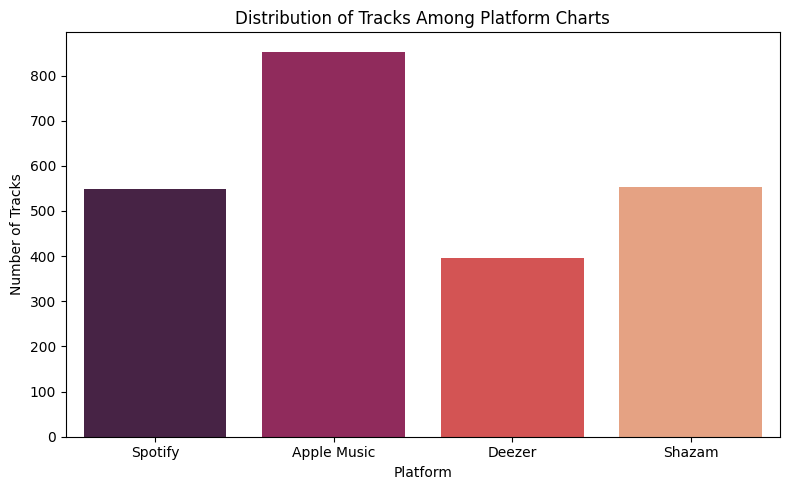

In [15]:
# Convert to DataFrame
platform_counts_df = pd.DataFrame(platform_counts)

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(data=platform_counts_df, x='Platform', y='Count', palette='rocket')
plt.xlabel('Platform')
plt.ylabel('Number of Tracks')
plt.title('Distribution of Tracks Among Platform Charts')
plt.tight_layout()
plt.show()

**Distribution of tracks across different music streaming platforms based on their inclusion in playlists.**

Spotify chart tracks: 549
Apple chart tracks: 853
Deezer chart tracks: 396


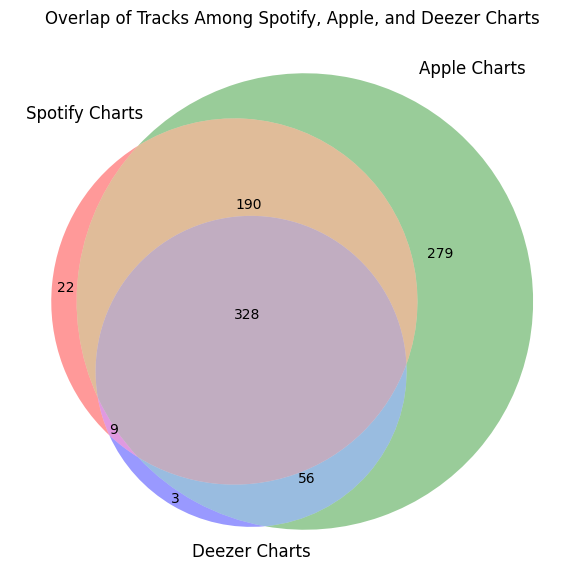

In [16]:
# Create sets of tracks for each chart platform
spotify_chart_tracks = set(df[df['in_spotify_charts'] > 0]['track_name'] + ' - ' + df['artist(s)_name'])
apple_chart_tracks = set(df[df['in_apple_charts'] > 0]['track_name'] + ' - ' + df['artist(s)_name'])
deezer_chart_tracks = set(df[df['in_deezer_charts'] > 0]['track_name'] + ' - ' + df['artist(s)_name'])

# Display the sizes of the sets to help diagnose issues
print(f'Spotify chart tracks: {len(spotify_chart_tracks)}')
print(f'Apple chart tracks: {len(apple_chart_tracks)}')
print(f'Deezer chart tracks: {len(deezer_chart_tracks)}')

# Create a Venn diagram
plt.figure(figsize=(10, 7))
venn3([spotify_chart_tracks, apple_chart_tracks, deezer_chart_tracks], ('Spotify Charts', 'Apple Charts', 'Deezer Charts'))
plt.title('Overlap of Tracks Among Spotify, Apple, and Deezer Charts')
plt.show()

      Platform  Average Number of Playlists
0      Spotify                  5200.124869
1  Apple Music                    67.812172
2       Deezer                   109.740275


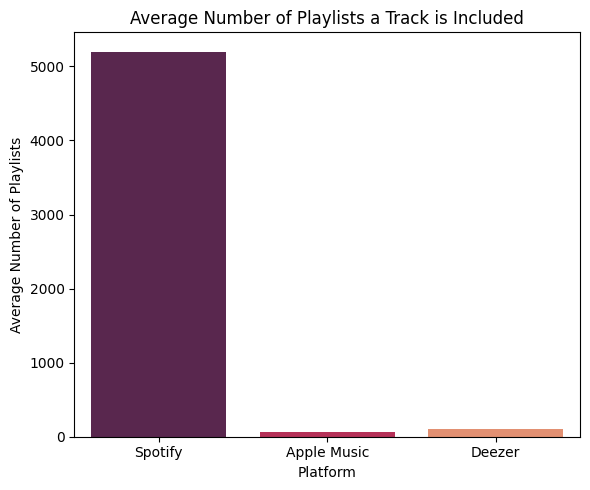

In [17]:
# Calculate the average number of playlists a track is included in for each platform
avg_playlists = {
    'Platform': ['Spotify', 'Apple Music', 'Deezer'],
    'Average Number of Playlists': [
        df['in_spotify_playlists'].mean(),
        df['in_apple_playlists'].mean(),
        df['in_deezer_playlists'].mean()
    ]
}

# Convert to DataFrame
avg_playlists_df = pd.DataFrame(avg_playlists)

# Display the average number of playlists for each platform
print(avg_playlists_df)

# Plotting the average number of playlists a track is included in
plt.figure(figsize=(6, 5))
sns.barplot(data=avg_playlists_df, x='Platform', y='Average Number of Playlists', palette='rocket')
plt.xlabel('Platform')
plt.ylabel('Average Number of Playlists')
plt.title('Average Number of Playlists a Track is Included')
plt.tight_layout()
plt.show()
